In [135]:
#Importando bibliotecas fundamentais para análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lendo arquivo CSV bank.csv
bank = pd.read_csv('bank.csv',sep=";")

In [3]:
#Determinando número de linhas e colunas do DataFrame
linhas = bank.shape[0]
colunas = bank.shape[1]
print("Linhas: {} Colunas {}".format(linhas,colunas))

Exibindo número de linhas e colunas
Linhas: 4521 Colunas 17


In [4]:
#Determinando nomes das colunas
nome_colunas = bank.columns.values
print(nome_colunas)

Nomes das colunas
['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


In [6]:
#Determinando o tipo de váriavel das colunas
tipo_var_colunas = bank.dtypes
print(tipo_var_colunas)

Tipo de variáveis das colunas
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [7]:
#Verificando se existem NaNs no dataframe
n_nans = bank[bank.isna()].count()
print(n_nans)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
#Exibindo informações sobre o dado
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB
None


In [9]:
#Exibindo cinco primeiras linhas
print(bank.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


Criando um novo DataFrame apenas com informações sobre os clientes

In [298]:
coluna_clientes = ["age","job","marital","education","default","housing","loan","y"]
clientes = bank[coluna_clientes]
print(clientes.head())

   age          job  marital  education default housing loan   y
0   30   unemployed  married    primary      no      no   no  no
1   33     services  married  secondary      no     yes  yes  no
2   35   management   single   tertiary      no     yes   no  no
3   30   management  married   tertiary      no     yes  yes  no
4   59  blue-collar  married  secondary      no     yes   no  no


Correlação dados dos clientes

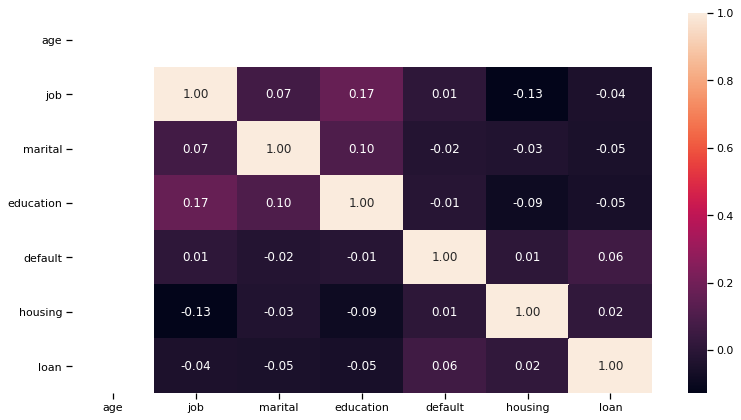

In [294]:
corr_clientes=clientes.corr()
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
sns.heatmap(corr_clientes, annot = True, fmt = ".2f")

Vamos agora analisar as variáves categóricas para determinar se eles possuem informações relevantes para a análise do problema

In [13]:
#Determinando as profissões
jobs = clientes['job'].unique()
print(jobs)

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


In [15]:
#Determinando os estados civis possiveis dos clientes
estado_civil = clientes['marital'].unique()
print(estado_civil)

['married' 'single' 'divorced']


In [16]:
#Determinando o grau de estudo dos clientes
educacao = clientes['education'].unique()
print(educacao)

['primary' 'secondary' 'tertiary' 'unknown']


In [17]:
#Determinando as possibilidades para saber se o cliente tem crédito ou não
credito = clientes['default'].unique()
print(credito)

['no' 'yes']


In [18]:
#Determinando as possibilidades para saber se o cliente tem casa ou não
credito = clientes['housing'].unique()
print(credito)

['no' 'yes']


In [19]:
#Determinando as possibilidades para saber se o cliente tem empréstimo pessoal ou não
loan = clientes['loan'].unique()
print(loan)

['no' 'yes']


Estudando a distribuição de idades

In [45]:
idade = clientes['age']
idade_min = idade.min()
idade_max = idade.max()
idade_mean = idade.mean()
idade_std = idade.std()
print("Idade miníma {:0.0f}".format(idade_min))
print("Idade máxima {:0.0f}".format(idade_max))
print("Idade média {:0.1f}".format(idade_mean))
print("Desvio padrão da idade {:0.1f}".format(idade_std))

Idade miníma 19
Idade máxima 87
Idade média 41.2
Desvio padrão da idade 10.6


Graficando a distribuição de idades

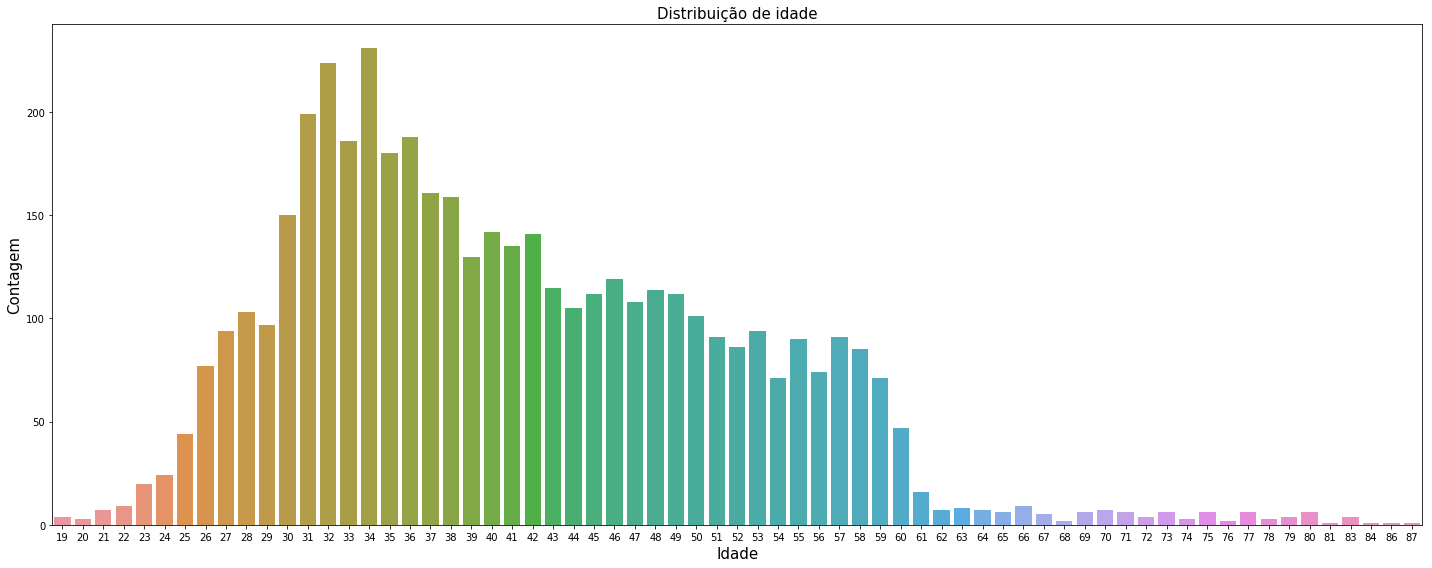

In [73]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = clientes)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de idade', fontsize=15)
plt.tight_layout()

Box plot da distribuição de idades para localizarmos outliers

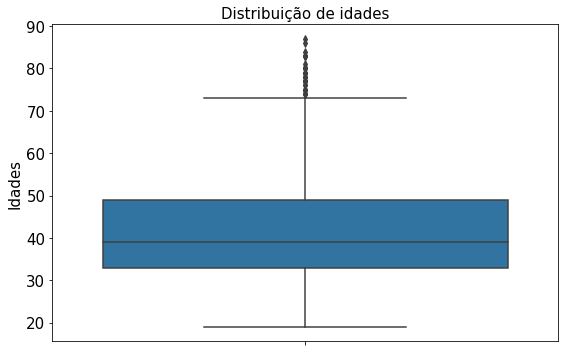

In [79]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x = 'age', data = clientes, orient = 'v', ax = ax)
ax.set_ylabel('Idades', fontsize=15)
ax.set_title('Distribuição de idades', fontsize=15)
ax.tick_params(labelsize=15)
plt.tight_layout() 

Determinando valores dos quartis para detectarmos a partir de qual idade temos outliers

In [87]:
q1 = clientes['age'].quantile(q = 0.25)
q2 = clientes['age'].quantile(q = 0.50)
q3 = clientes['age'].quantile(q = 0.75)
q4 = clientes['age'].quantile(q = 1.00)
outliers = q3 + 1.5*(q3-q1)
print("Primeiro quartil = {:0.1f}".format(q1))
print("Segundo quartil = {:0.1f}".format(q2))
print("Terceiro quartil = {:0.1f}".format(q3))
print("Quarto quartil = {:0.1f}".format(q4))
print("Outliers = {:0.1f}".format(outliers))

Primeiro quartil = 33.0
Segundo quartil = 39.0
Terceiro quartil = 49.0
Quarto quartil = 87.0
Outliers = 73.0


Idades acima de 73 anos são outliers

In [110]:
num_outliers = clientes[clientes['age'] > outliers]['age'].count()
print("Numero de outliers = {:0.0f}".format(num_outliers))
perc_num_outliers = 100.0*num_outliers/len(clientes)
print("Numero de outliers = {:0.2f} %".format(perc_num_outliers))

Numero de outliers = 38
Numero de outliers = 0.84 %


Graficando a distribuição de profissões

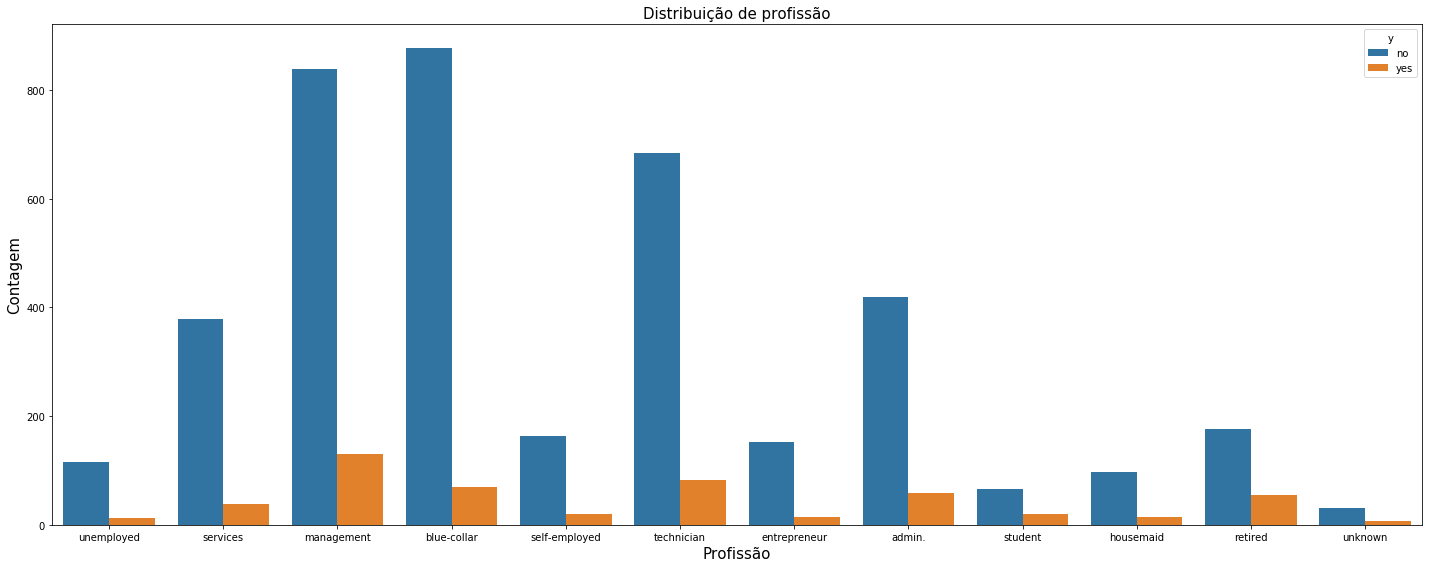

In [122]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = clientes, hue='y')
ax.set_xlabel('Profissão', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de profissão', fontsize=15)
plt.tight_layout()

Analisando o estado civil dos clientes

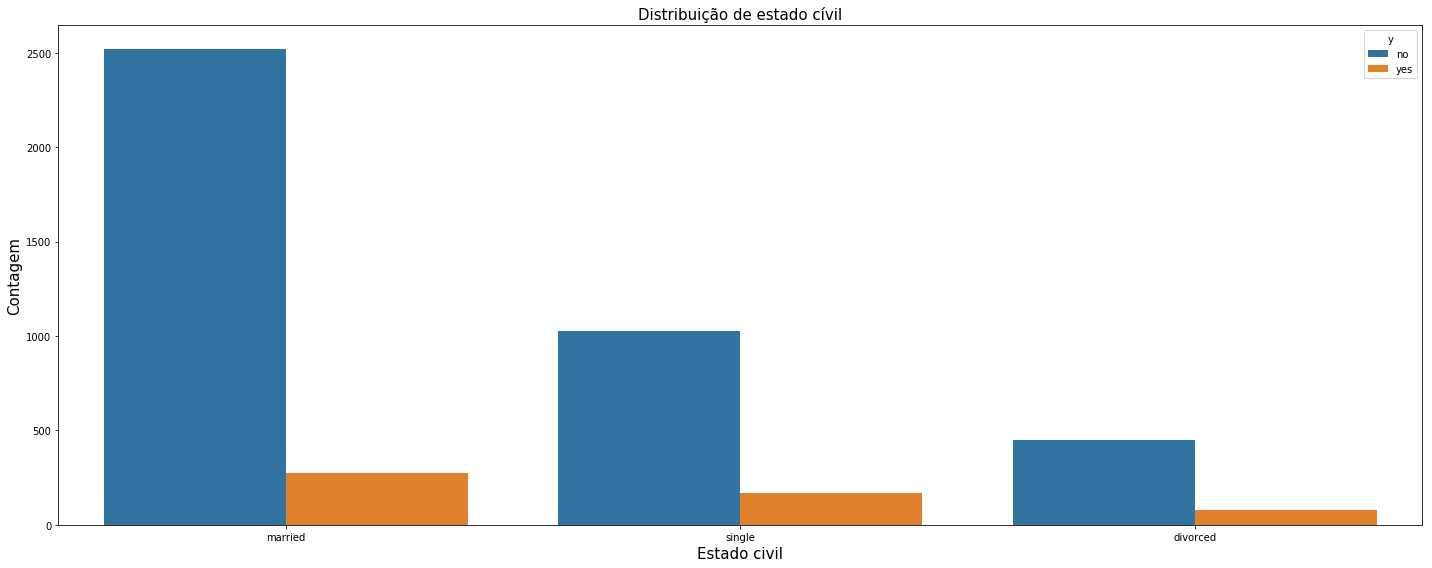

In [121]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = clientes, hue='y')
ax.set_xlabel('Estado civil', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de estado cívil', fontsize=15)
plt.tight_layout()

Analisando a distribuição de educação

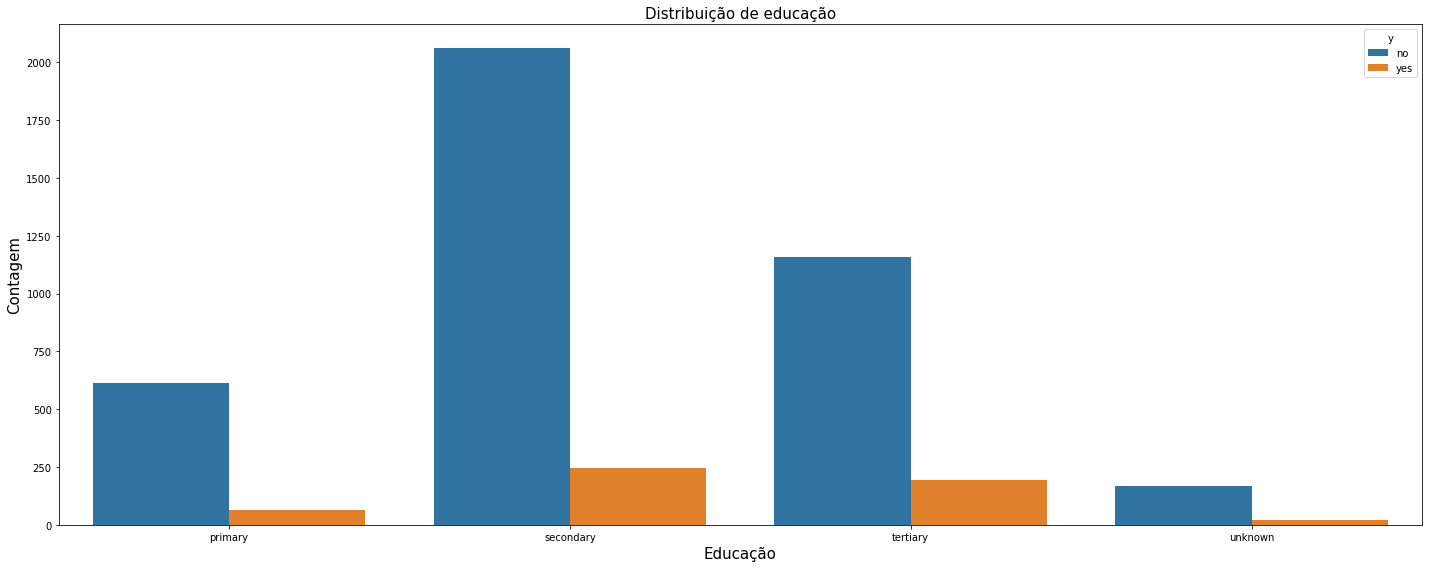

In [123]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data = clientes, hue='y')
ax.set_xlabel('Educação', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de educação', fontsize=15)
plt.tight_layout()

Analisando o perfil de crédito

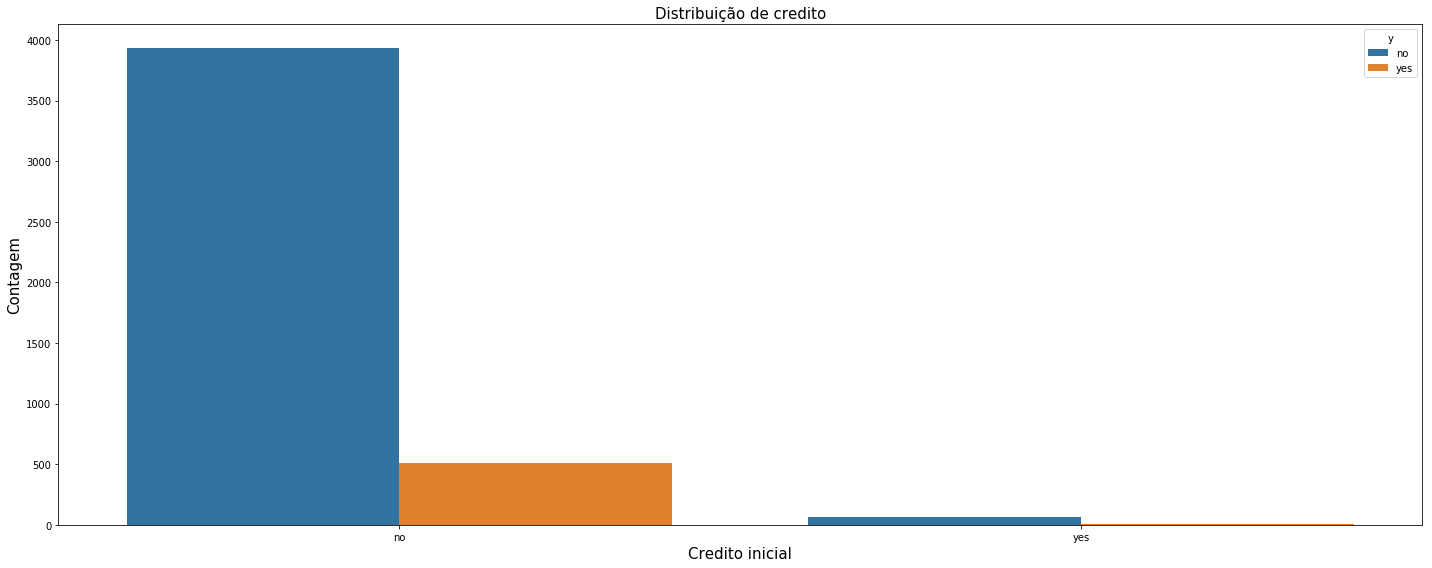

In [124]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'default', data = clientes, hue='y')
ax.set_xlabel('Credito inicial', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de credito', fontsize=15)
plt.tight_layout()

Analisando o perfil de cliente que tem ou não casa

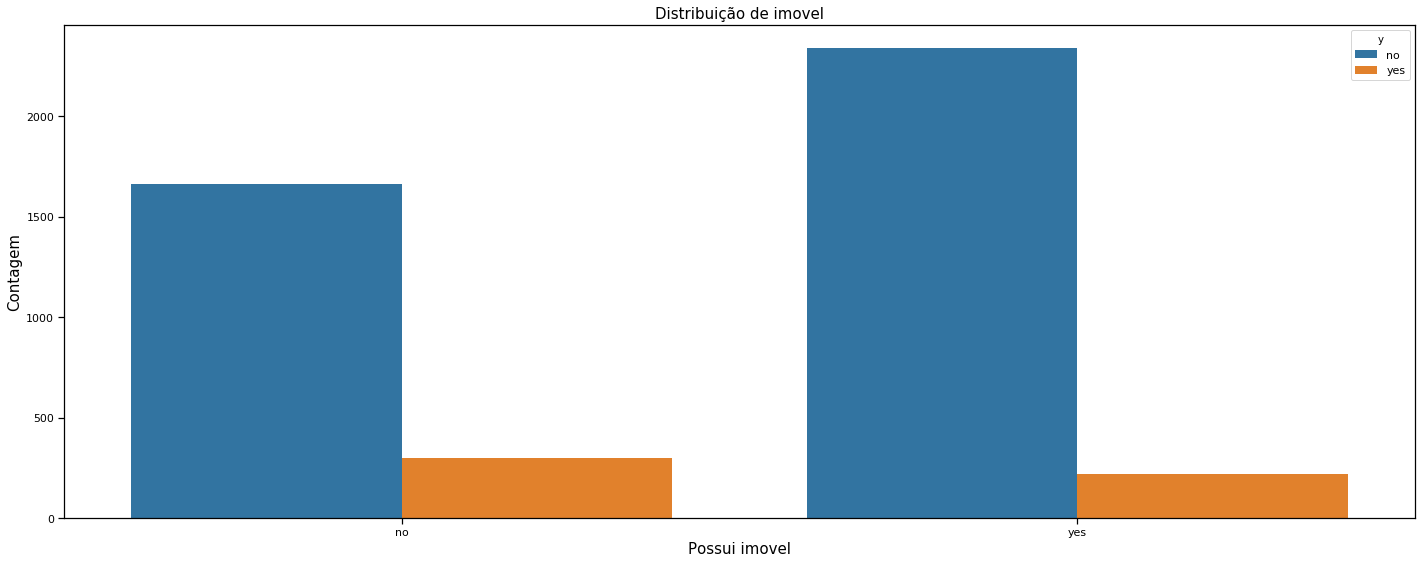

In [299]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'housing', data = clientes, hue='y')
ax.set_xlabel('Possui imovel', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de imovel', fontsize=15)
plt.tight_layout()

Analisando o perfil de clientes que já tem ou não emprestimo

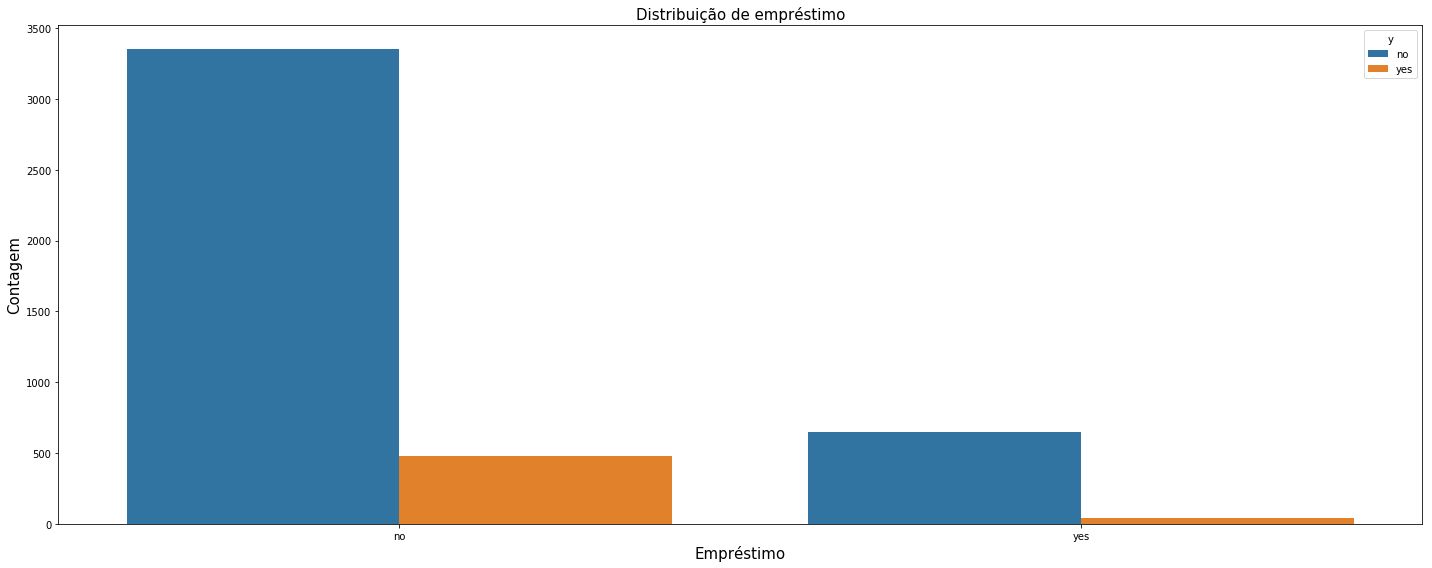

In [127]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'loan', data = clientes, hue='y')
ax.set_xlabel('Empréstimo', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de empréstimo', fontsize=15)
plt.tight_layout()

Convertendo variáveis categóricas, presentes no DataFrame Clientes, para valores numéricos

In [128]:
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()

In [136]:
clientes['job']      = enconder.fit_transform(clientes['job']) 
clientes['marital']  = enconder.fit_transform(clientes['marital']) 
clientes['education']= enconder.fit_transform(clientes['education']) 
clientes['default']  = enconder.fit_transform(clientes['default']) 
clientes['housing']  = enconder.fit_transform(clientes['housing']) 
clientes['loan']     = enconder.fit_transform(clientes['loan']) 
clientes['y']        = enconder.fit_transform(clientes['y']) 

In [130]:
#Verificando se a conversão foi bem sucessida
print(clientes.head())

   age  job  marital  education  default  housing  loan  y
0   30   10        1          0        0        0     0  0
1   33    7        1          1        0        1     1  0
2   35    4        2          2        0        1     0  0
3   30    4        1          2        0        1     1  0
4   59    1        1          1        0        1     0  0


Criando grupo de clientes baseado em suas idades

Grupo 1: idade <= 30

Grupo 2: 30<idade<=50

Grupo 3: 50<idade<=70

Grupo 4: idade>70

In [131]:
def grupo_idade(dados):
    dados.loc[dados['age'] <= 30, 'age'] = 1
    dados.loc[(dados['age'] > 30) & (dados['age'] <= 50), 'age'] = 2
    dados.loc[(dados['age'] > 50) & (dados['age'] <= 70), 'age'] = 3
    dados.loc[dados['age'] > 70, 'age'] = 4
           
    return dados

In [137]:
clientes = grupo_idade(clientes)

In [134]:
#Verificando o DataFrame para verificar se o perfil da idade está correto
print(clientes.head())

   age  job  marital  education  default  housing  loan  y
0    1   10        1          0        0        0     0  0
1    2    7        1          1        0        1     1  0
2    2    4        2          2        0        1     0  0
3    1    4        1          2        0        1     1  0
4    3    1        1          1        0        1     0  0


Analisando agora os dados relacionados ao contato com o cliente

In [145]:
colunas = ['contact','month','day','duration','y']
contato = bank[colunas]

In [146]:
print(contato.head())

    contact month  day  duration   y
0  cellular   oct   19        79  no
1  cellular   may   11       220  no
2  cellular   apr   16       185  no
3   unknown   jun    3       199  no
4   unknown   may    5       226  no


Correlação contato

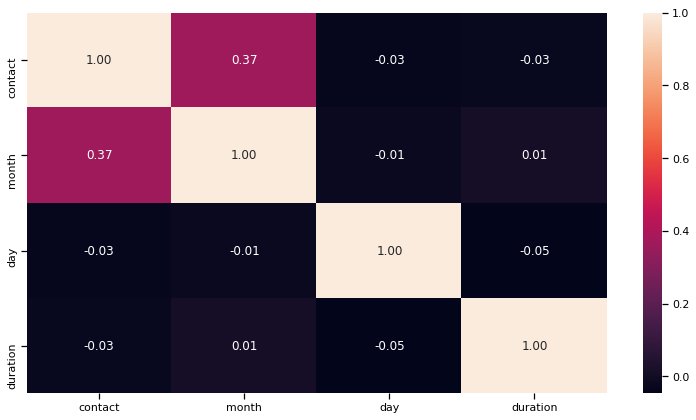

In [295]:
corr_contato=contato.corr()
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
sns.heatmap(corr_contato, annot = True, fmt = ".2f")

Determinando os tipos de contato

In [141]:
tipo_contato = contato['contact'].unique()
print(tipo_contato)

['cellular' 'unknown' 'telephone']


Determinando os meses da campanha

In [142]:
mes_campanha = contato['month'].unique()
print(mes_campanha)

['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']


Determinando os dias da campanha

In [143]:
dia_campanha = contato['day'].unique()
print(dia_campanha)

[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]


Analisando a duração das chamadas

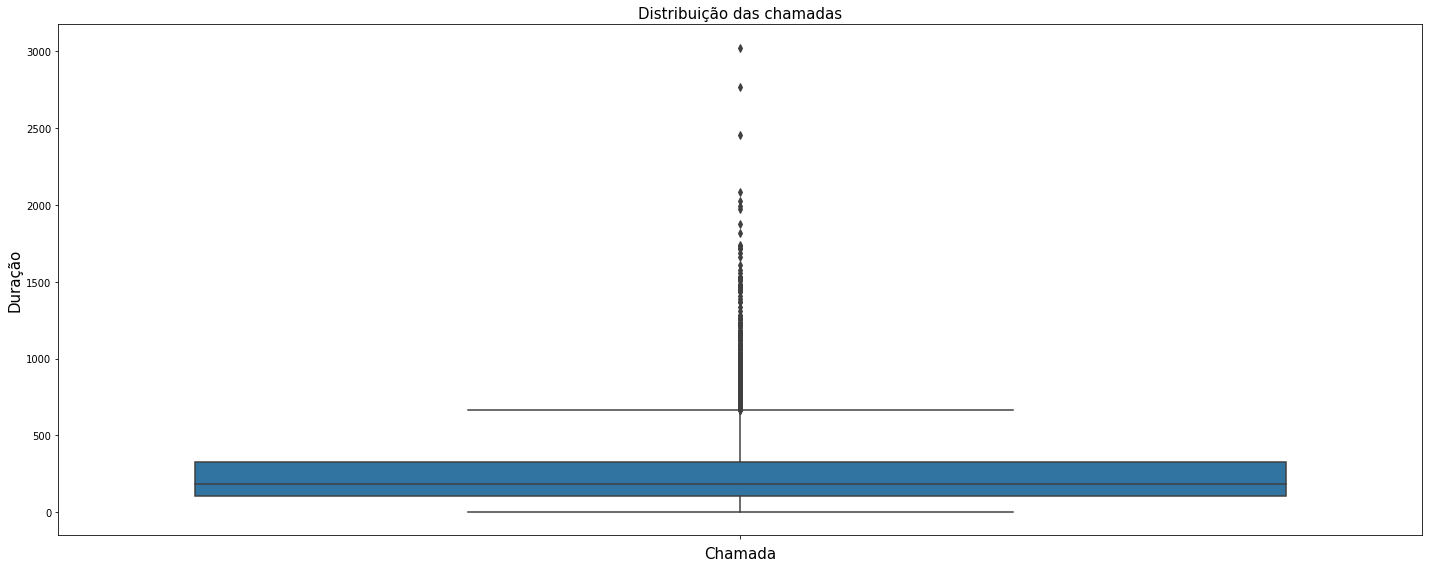

In [150]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.boxplot(x = 'duration', data = contato, hue='y', orient = 'v')
ax.set_xlabel('Chamada', fontsize=15)
ax.set_ylabel('Duração', fontsize=15)
ax.set_title('Distribuição das chamadas', fontsize=15)
plt.tight_layout()

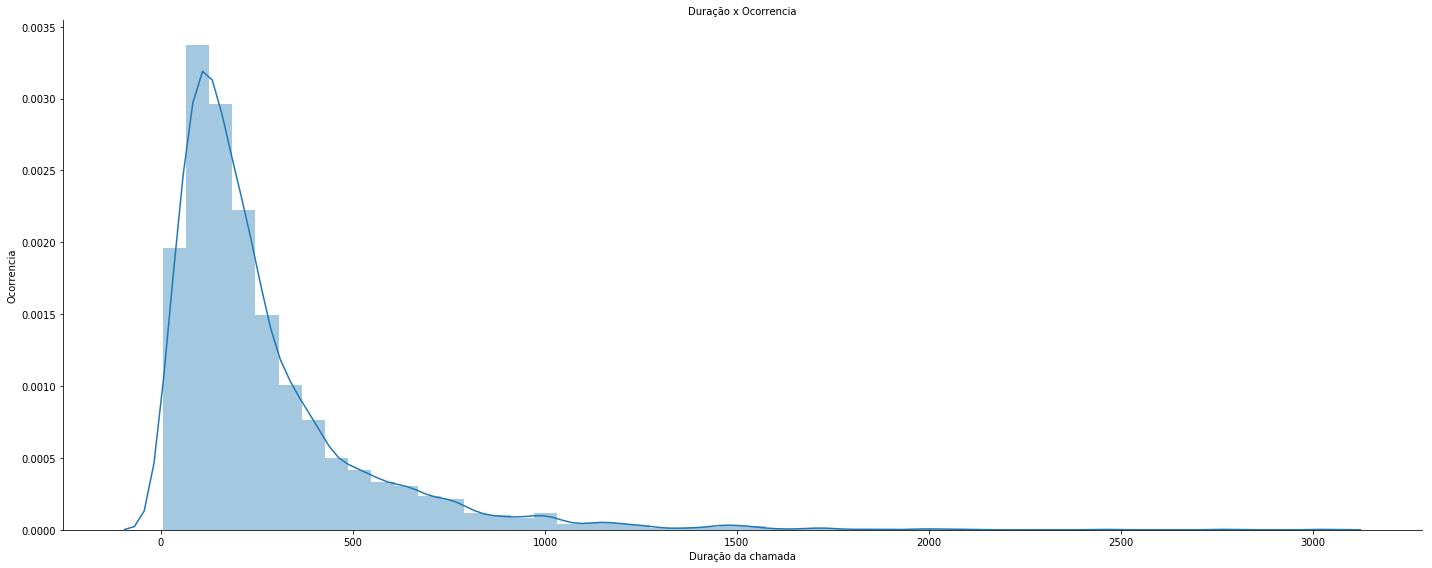

In [153]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.distplot(contato['duration'])
sns.despine(ax = ax)
ax.set_xlabel('Duração da chamada', fontsize=10)
ax.set_ylabel('Ocorrencia', fontsize=10)
ax.set_title('Duração x Ocorrencia', fontsize=10)
ax.tick_params(labelsize=10)
plt.tight_layout()

In [158]:
duracao_min = contato['duration'].min()/60.0
print("Duração mínima: {:0.1f} minutos".format(duracao_min))
duracao_max = contato['duration'].max()/60.0
print("Duração máxima: {:0.1f} minutos".format(duracao_max))
duracao_mean = contato['duration'].mean()/60.0
print("Duração média: {:0.1f} minutos".format(duracao_mean))
duracao_std = contato['duration'].std()/60.0
print("Duração std: {:0.1f} minutos".format(duracao_std))

Duração mínima: 0.1 minutos
Duração máxima: 50.4 minutos
Duração média: 4.4 minutos
Duração std: 4.3 minutos


In [161]:
q1c = contato['duration'].quantile(q = 0.25)/60.0
q2c = contato['duration'].quantile(q = 0.50)/60.0
q3c = contato['duration'].quantile(q = 0.75)/60.0
q4c = contato['duration'].quantile(q = 1.00)/60.0
outliers_c = q3c + 1.5*(q3c-q1c)
print("Primeiro quartil = {:0.1f}".format(q1c))
print("Segundo quartil = {:0.1f}".format(q2c))
print("Terceiro quartil = {:0.1f}".format(q3c))
print("Quarto quartil = {:0.1f}".format(q4c))
print("Outliers = {:0.1f}".format(outliers_c))

Primeiro quartil = 1.7
Segundo quartil = 3.1
Terceiro quartil = 5.5
Quarto quartil = 50.4
Outliers = 11.1


Chamadas com mais de 11.1 minutos são outliers

In [163]:
num_outliers_c = contato[contato['duration'] > outliers_c*60.0]['duration'].count()
print("Numero de outliers = {:0.0f}".format(num_outliers_c))
perc_num_outliers_c = 100.0*num_outliers_c/len(contato)
print("Numero de outliers = {:0.2f} %".format(perc_num_outliers_c))

Numero de outliers = 330
Numero de outliers = 7.30 %


Verificando registros de chamadas não atendidas

In [167]:
chamadas_neg = contato[(contato['duration'] == 0)].count()
print(chamadas_neg)

contact     0
month       0
day         0
duration    0
y           0
dtype: int64


Distribuição dos contatos telefonicos

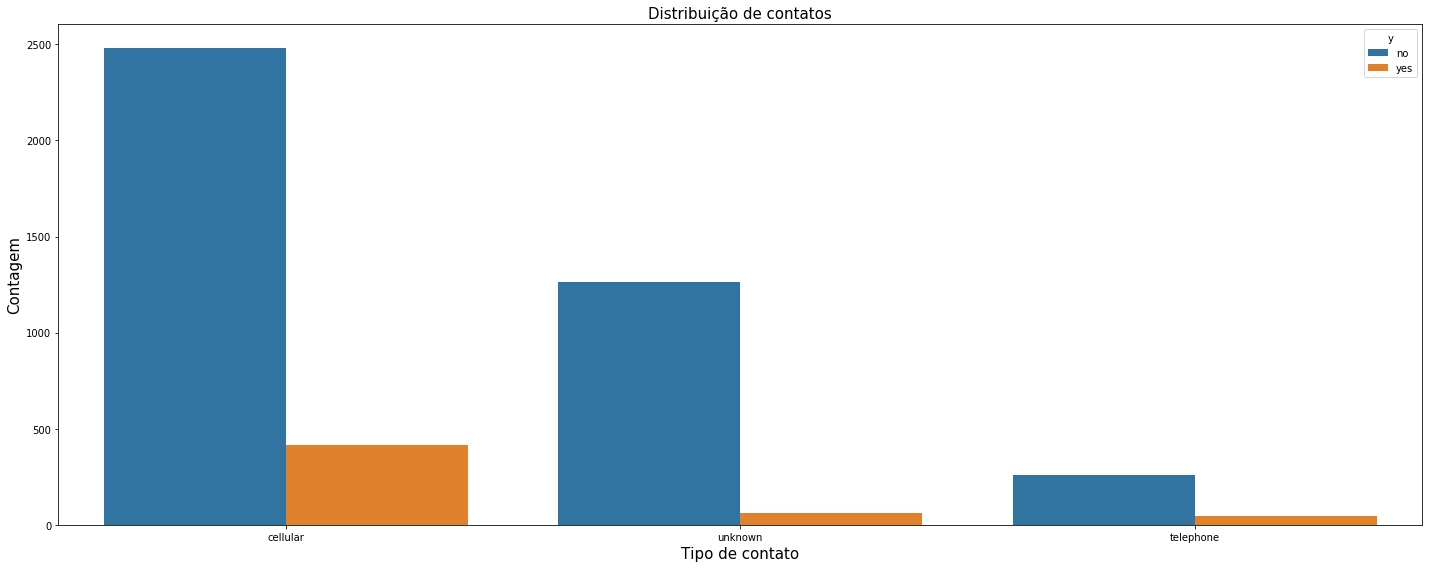

In [168]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'contact', data = contato, hue='y')
ax.set_xlabel('Tipo de contato', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de contatos', fontsize=15)
plt.tight_layout()

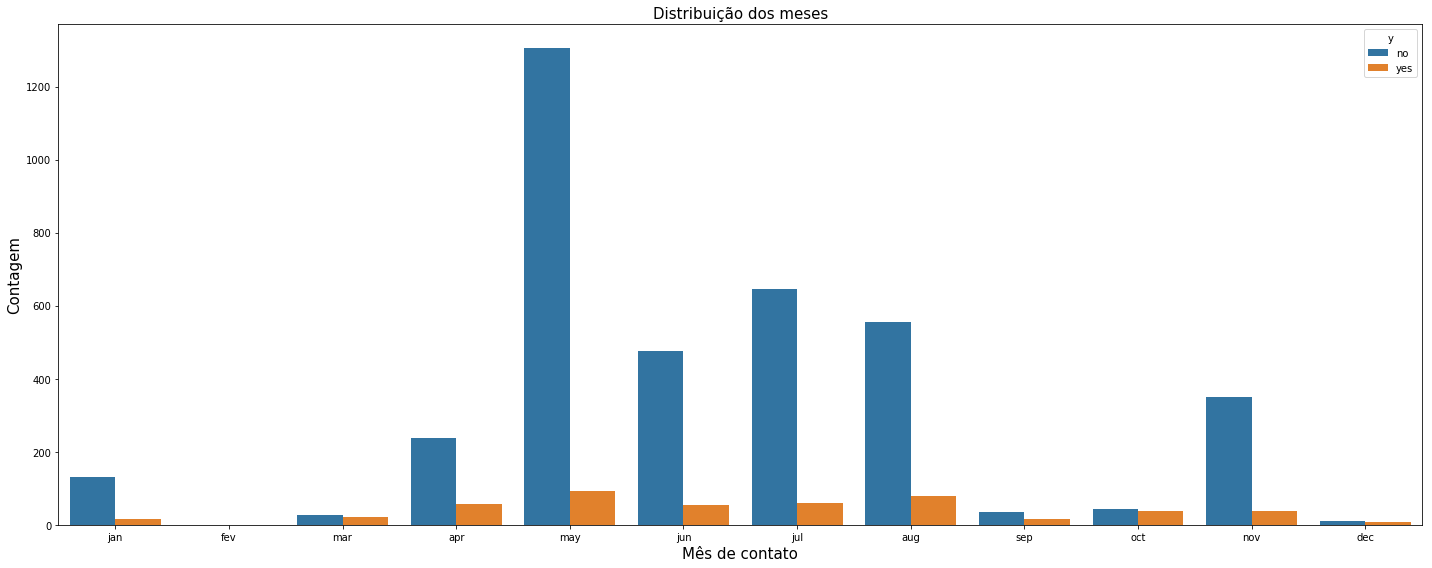

In [170]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'month', data = contato, hue='y', order = ['jan','fev','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel('Mês de contato', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição dos meses', fontsize=15)
plt.tight_layout()

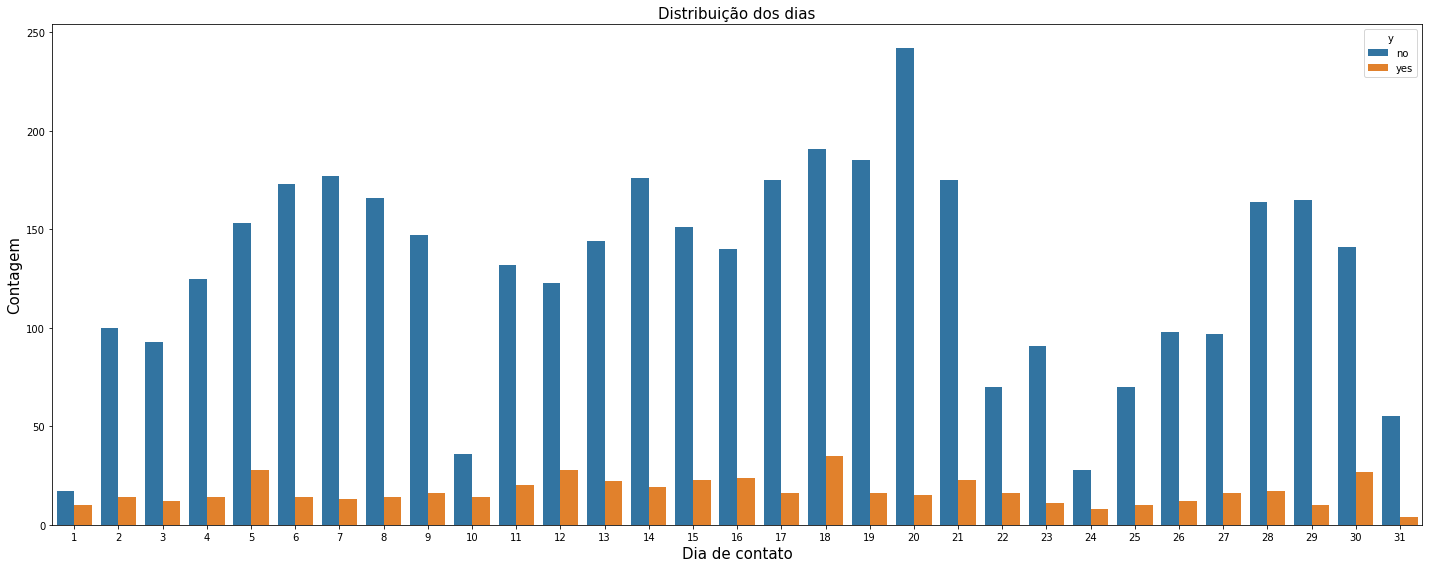

In [172]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'day', data = contato, hue='y', order = list(range(1,32)))
ax.set_xlabel('Dia de contato', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição dos dias', fontsize=15)
plt.tight_layout()

Criando grupo de contato baseado na duração da chamada

In [174]:
def grupo_duracao(duracao):
    duracao.loc[duracao['duration'] <= 120, 'duration'] = 1
    duracao.loc[(duracao['duration'] > 120) & (duracao['duration'] <= 180), 'duration'] = 2
    duracao.loc[(duracao['duration'] > 180) & (duracao['duration'] <= 300), 'duration'] = 3
    duracao.loc[(duracao['duration'] > 300) & (duracao['duration'] <= 600), 'duration'] = 4
    duracao.loc[duracao['duration'] > 600, 'duration'] = 5
           
    return duracao

In [175]:
contato = grupo_duracao(contato)

In [177]:
#Verificando se a conversão foi bem sucedida
print(contato.head())

    contact month  day  duration   y
0  cellular   oct   19         1  no
1  cellular   may   11         3  no
2  cellular   apr   16         3  no
3   unknown   jun    3         3  no
4   unknown   may    5         3  no


Convertendo variáveis categóricas de contato para valores numéricos

In [178]:
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()

In [180]:
contato['contact'] = enconder.fit_transform(contato['contact']) 
contato['month'] = enconder.fit_transform(contato['month']) 
contato['y'] = enconder.fit_transform(contato['y']) 

In [181]:
#Verificando se a conversão foi bem sucessida
print(contato.head())

   contact  month  day  duration  y
0        0     10   19         1  0
1        0      8   11         3  0
2        0      0   16         3  0
3        2      6    3         3  0
4        2      8    5         3  0


Analisando os atributos da campanha

In [183]:
colunas_camp = ['campaign','pdays','previous','poutcome','y']
campanha = bank[colunas_camp]

In [184]:
print(campanha.head())

   campaign  pdays  previous poutcome   y
0         1     -1         0  unknown  no
1         1    339         4  failure  no
2         1    330         1  failure  no
3         4     -1         0  unknown  no
4         1     -1         0  unknown  no


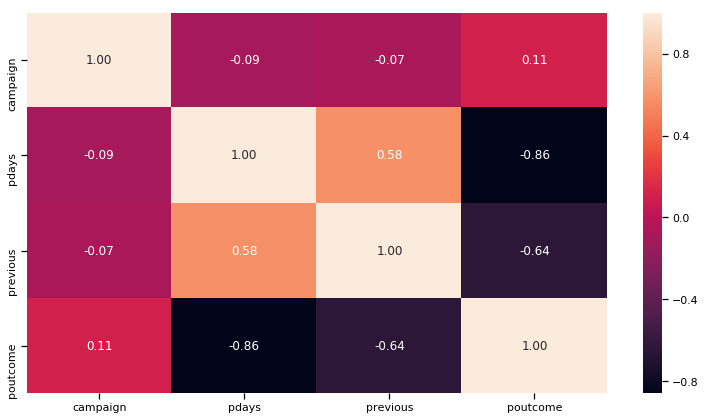

In [296]:
corr_campanha=campanha.corr()
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
sns.heatmap(corr_campanha, annot = True, fmt = ".2f")

Determinando os números de contatos

In [185]:
print(campanha['campaign'].unique())

[ 1  4  2  5  3  6 18 10  9  7 12 14 13 24 11  8 29 32 16 22 15 30 25 21
 17 19 23 20 50 28 31 44]


Determinando o número de possiveis dias que se passaram

In [186]:
print(campanha['pdays'].unique())

[ -1 339 330 176 147 241 152 105 342 101   5  92  56 170 182 297 196 460
 137 367 145 169 207 266 288 168 345 436  90 183 146 335 347 119   7 271
 181  88 141 126  61 373 351 242  62  91 308 250 172 265  78  28  79   1
 188 167  89 164 462 209 321 254  94 364  96 356 149 363 275 325 341 260
 358  87 303  98 327 337 322 102  99 370  84 212  63  81 191 360 332  80
  85 247 150 175 382 261 336  58 206 112 199 133 208 253 135 278 140 298
 273 124 281 162 323 349 117   2 256 333 116 268 136 198 357 259 353 174
 371 205 246  69 315 110 461 184 270 127 187  64 130 346 100 352 808 113
 378 292 287 107 293 139 138 193 274  97 103 359 185 674 211 300 334 280
 479  95 262 362 225   3 366  60 190 368 122 343 131 365 299 115 316 180
 154 313 264 350  73 232 204 143 375 186 344 210 248 177 221 189 104 258
 305 171 120 317 178 386 118 404 374 282 179 284 227 291 173 871 238 294
 222 435 340 426 239  83 111 415 255 235 244  38 683 329  59 151 192 158
 338 388 165 348 197 295 109 484 326 369 397 414 31

Determinando o número de contatos antes da campanha

In [187]:
print(campanha['previous'].unique())

[ 0  4  1  3  2  5 20  7  6 10  9  8 18 19 12 13 11 14 15 24 17 22 23 25]


Determinando os resultados da última campanha

In [188]:
print(campanha['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


Graficando distribuição anterior

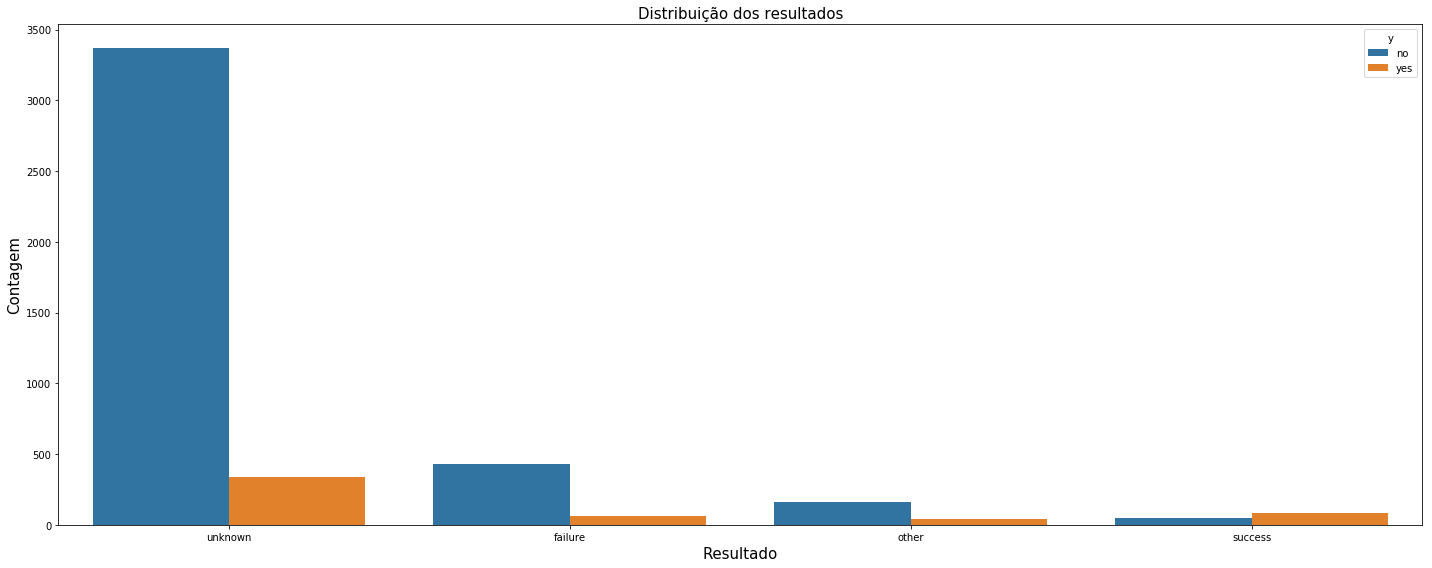

In [190]:
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'poutcome', data = campanha, hue='y')
ax.set_xlabel('Resultado', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição dos resultados', fontsize=15)
plt.tight_layout()

Convertendo variaveis categórias da campanha para valores numéricos

In [191]:
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()

In [195]:
campanha['poutcome'] = enconder.fit_transform(campanha['poutcome']) 
campanha['y'] = enconder.fit_transform(campanha['y']) 

In [196]:
#Verificando se a conversão foi bem sucedida
print(campanha.head())

   campaign  pdays  previous  poutcome  y
0         1     -1         0         3  0
1         1    339         4         0  0
2         1    330         1         0  0
3         4     -1         0         3  0
4         1     -1         0         3  0


Isolando a variável do resultado final

In [199]:
resultado = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)

Removendo a coluna do resultado de todos os DataFrames

In [203]:
campanha = campanha.drop('y',axis=1)
print(campanha.head())

   campaign  pdays  previous  poutcome
0         1     -1         0         3
1         1    339         4         0
2         1    330         1         0
3         4     -1         0         3
4         1     -1         0         3


In [204]:
contato = contato.drop('y',axis=1)
print(contato.head())

   contact  month  day  duration
0        0     10   19         1
1        0      8   11         3
2        0      0   16         3
3        2      6    3         3
4        2      8    5         3


In [205]:
clientes = clientes.drop('y',axis=1)
print(clientes.head())

   age  job  marital  education  default  housing  loan
0    1   10        1          0        0        0     0
1    1    7        1          1        0        1     1
2    1    4        2          2        0        1     0
3    1    4        1          2        0        1     1
4    1    1        1          1        0        1     0


Concatenando os DataFrames

In [206]:
banco = pd.concat([clientes,contato,campanha], axis = 1)

In [207]:
print(banco.head())

   age  job  marital  education  default  housing  loan  contact  month  day  \
0    1   10        1          0        0        0     0        0     10   19   
1    1    7        1          1        0        1     1        0      8   11   
2    1    4        2          2        0        1     0        0      0   16   
3    1    4        1          2        0        1     1        2      6    3   
4    1    1        1          1        0        1     0        2      8    5   

   duration  campaign  pdays  previous  poutcome  
0         1         1     -1         0         3  
1         3         1    339         4         0  
2         3         1    330         1         0  
3         3         4     -1         0         3  
4         3         1     -1         0         3  


Separando numa amostra de treino e teste

In [208]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(banco, resultado, test_size = 0.25, random_state = 101)

In [213]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

Importanto bibliotecas para determinar melhor modelo de previsão

In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Utilizando modelo de regressão logistica

In [217]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(X_treino,y_treino)
logpred = logreg.predict(X_teste)

Exibindo matriz de confusão para o modelo de regressão logística

In [219]:
matriz_logreg = confusion_matrix(y_teste, logpred)
print(matriz_logreg)

[[976  24]
 [109  22]]


Determinando a acurácia do modelo de regressão logística

In [221]:
acc_logreg = accuracy_score(y_teste, logpred)*100
print("Acurácia Regressão Logística = {:0.2f}%".format(acc_logreg))

Acurácia Regressão Logística = 88.24%


Validação cruzada Regressão logística

In [225]:
cv_logreg = (cross_val_score(logreg, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_logreg*100))

Cross-Validation = 88.53%


Utilizando modelo KNN para previsão

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [254]:
#número de vizinhos
vizinhos = np.arange(0,35)

In [255]:
#Lista vazina para armazenar notas da validação cruzada
notas_cv = []
for k in vizinhos:
    valor_k = k+1
    knn = KNeighborsClassifier(n_neighbors = valor_k, weights='uniform', p=3, metric='minkowski')
    kfold = KFold(n_splits=10, random_state=123)
    notas = cross_val_score(knn, X_treino, y_treino, cv=kfold, scoring='accuracy')
    notas_cv.append(notas.mean()*100)
    print("vizinhos=%d %0.2f (+/- %0.2f)" % (valor_k, notas.mean()*100, notas.std()*100))

vizinhos=1 85.87 (+/- 1.76)
vizinhos=2 88.85 (+/- 1.86)
vizinhos=3 88.67 (+/- 2.00)
vizinhos=4 88.82 (+/- 1.84)
vizinhos=5 88.47 (+/- 1.76)
vizinhos=6 88.76 (+/- 1.81)
vizinhos=7 88.50 (+/- 1.85)
vizinhos=8 88.70 (+/- 2.03)
vizinhos=9 88.47 (+/- 1.73)
vizinhos=10 88.79 (+/- 1.64)
vizinhos=11 88.61 (+/- 1.83)
vizinhos=12 88.64 (+/- 1.92)
vizinhos=13 88.64 (+/- 1.87)
vizinhos=14 88.70 (+/- 1.93)
vizinhos=15 88.61 (+/- 1.90)
vizinhos=16 88.67 (+/- 2.12)
vizinhos=17 88.61 (+/- 2.12)
vizinhos=18 88.67 (+/- 2.01)
vizinhos=19 88.58 (+/- 2.07)
vizinhos=20 88.61 (+/- 1.92)
vizinhos=21 88.70 (+/- 2.04)
vizinhos=22 88.79 (+/- 1.95)
vizinhos=23 88.61 (+/- 1.96)
vizinhos=24 88.76 (+/- 2.04)
vizinhos=25 88.70 (+/- 2.00)
vizinhos=26 88.82 (+/- 1.87)
vizinhos=27 88.82 (+/- 1.94)
vizinhos=28 88.82 (+/- 1.86)
vizinhos=29 88.79 (+/- 1.94)
vizinhos=30 88.85 (+/- 1.82)
vizinhos=31 88.85 (+/- 1.92)
vizinhos=32 88.79 (+/- 1.79)
vizinhos=33 88.73 (+/- 1.87)
vizinhos=34 88.76 (+/- 1.82)
vizinhos=35 88.82 (+/- 

In [256]:
#Determinando melhor valor de vizinhos
melhor_k = vizinhos[notas_cv.index(max(notas_cv))] + 1
print(melhor_k)

30


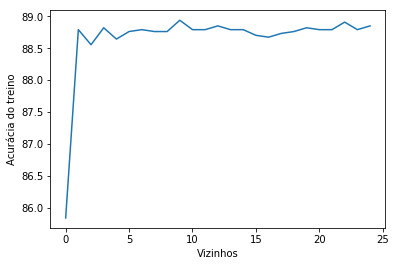

In [233]:
plt.plot(vizinhos, notas_cv)
plt.xlabel('Vizinhos')
plt.ylabel('Acurácia do treino')
plt.show()

Utilizando modelo KNN com n=9

In [257]:
knn = KNeighborsClassifier(n_neighbors=melhor_k, weights='uniform', p=3, metric='minkowski')
knn.fit(X_treino, y_treino)
knn_pred = knn.predict(X_teste)

Matriz de confusão do modelo KNN

In [258]:
matriz_knn = confusion_matrix(y_teste, knn_pred)
print(matriz_knn)

[[993   7]
 [125   6]]


Validação cruzada KNN

In [259]:
cv_knn = (cross_val_score(knn, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_knn*100))

Cross-Validation = 88.76%


Utilizando modelo SVC para previsão

In [261]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_treino, y_treino)
svc_pred = svc.predict(X_teste)

Matriz de confusão do modelo SVC

In [262]:
matriz_svc = confusion_matrix(y_teste, svc_pred)
print(matriz_svc)

[[949  51]
 [ 95  36]]


Validação utilizando SVC

In [263]:
cv_svc = (cross_val_score(svc, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_svc*100))

Cross-Validation = 84.66%


Utilizando modelo DecisionTreeClassifier (DTE) para previsão

In [268]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(criterion='entropy') #criterion = entopy, gini
dte.fit(X_treino, y_treino)
dte_pred = dte.predict(X_teste)

Matriz de confusão do modelo DTE

In [269]:
matriz_dte = confusion_matrix(y_teste, dte_pred)
print(matriz_dte)

[[921  79]
 [ 71  60]]


Validação utilizando DTE

In [270]:
cv_dte = (cross_val_score(dte, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_dte*100))

Cross-Validation = 86.43%


Utilizando modelo RandomForestClassifier (RFC) para previsão

In [278]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 250,criterion='gini')#criterion = entopy,gini
rfc.fit(X_treino, y_treino)
rfc_pred = rfc.predict(X_teste)

Matriz de confusão do modelo RFC

In [279]:
matriz_rfc = confusion_matrix(y_teste, rfc_pred)
print(matriz_rfc)

[[972  28]
 [ 99  32]]


Validação utilizando RFC

In [280]:
cv_rfc = (cross_val_score(rfc, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_rfc*100))

Cross-Validation = 89.68%


Utilizando modelo GaussianNB (GNB) para previsão

In [281]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_treino, y_treino)
gnb_pred = gnb.predict(X_teste)

Matriz de confusão do modelo GNB

In [282]:
matriz_gnb = confusion_matrix(y_teste, gnb_pred)
print(matriz_gnb)

[[901  99]
 [ 89  42]]


Validação utilizando GNB

In [285]:
cv_gnb = (cross_val_score(gnb, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_gnb*100))

Cross-Validation = 83.98%


Utilizando modelo XGBClassifier (XGB) para previsão

In [286]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_treino, y_treino)
xgb_pred = xgb.predict(X_teste)

Matriz de confusão do modelo XGB

In [287]:
matriz_xgb = confusion_matrix(y_teste, xgb_pred)
print(matriz_xgb)

[[976  24]
 [ 97  34]]


Validação utilizando XGB

In [288]:
cv_xgb = (cross_val_score(xgb, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_xgb*100))

Cross-Validation = 89.97%


Utilizando modelo GradientBoostingClassifier (GBC) para previsão

In [289]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_treino, y_treino)
gbc_pred = gbc.predict(X_teste)

Matriz de confusão do modelo GBC

In [290]:
matriz_gbc = confusion_matrix(y_teste, gbc_pred)
print(matriz_gbc)

[[974  26]
 [ 87  44]]


Validação utilizando GBC

In [291]:
cv_gbc = (cross_val_score(gbc, X_treino, y_treino, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross-Validation = {:0.2f}%".format(cv_gbc*100))

Cross-Validation = 90.21%


Armazenando resultados num DataFrame

In [292]:
modelos = pd.DataFrame({'Modelos': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [cv_rfc, cv_dte, cv_svc, cv_knn, cv_logreg, cv_gnb, cv_xgb, cv_gbc]})

In [293]:
modelos.sort_values(by='Score', ascending=False)

,Modelos,Score
7,Gradient Boosting,0.902065
6,XGBoost,0.899705
0,Random Forest Classifier,0.896755
3,K-Near Neighbors,0.887611
4,Logistic Model,0.885251
1,Decision Tree Classifier,0.864307
2,Support Vector Machine,0.846608
5,Gausian NB,0.839823


# Relatório 

Os dados mostram que os clientes tem idade entre 19 e 87 anos, com uma idade média de 41.2 anos e um desvio padrão de 10.6 anos. Da distribuição de idades, verificou-se que clientes com mais de 73 anos são considerados outliers, o que corresponde a 0.84% dos clientes. 

Os clientes que trabalham como blue-collar são os que mais recusaram as propostas de empréstimo, enquanto que os que ocupam posição de gerenciamento aceitam mais propostas. Os clientes casados, receberam e aceitaram mais propostas de empréstimos o que sugere que clientes casados tem mais responsabilidade. Os clientes que possuem apenas ensino médio receberam mais propostas e este mesmo grupo junto com os que possuem ensino superior aceitaram mais empréstimos, indicando que clientes com ensino superior são um bom alvo para ligações. Clientes que não possuíam crédito inicial receberam mais propostas e também tiver um maior índice de aceitação e já a grande maioria dos que possuíam crédito inicial recusaram a oferta. Clientes que possuem imóvel receberam mais propostas, porém os que não possuem aceitaram mais as ofertas. Os clientes que já haviam feito um empréstimo anteriormente aceitaram menos propostas em relação aos que não tinham empréstimo anterior e o grupo dos clientes sem empréstimo anterior é um alvo melhor.

As chamadas telefónicas tiveram uma duração média de 4.4 minutos e um desvio padrão de 4.3 minutos. A chamada com maior duração teve 50.4 minutos. Chamadas com duração superior a 11.1 minutos são outliers. Os clientes que receberam ligações em seus celulares aceitaram mais propostas. 

O mês de maio foi o que mais teve propostas porém juntamente com o mês de agosto foram os que tiveram mais aceitações porém os dados nos mostram que agosto é o melhor mês para se ligar para o cliente, sendo que a ligação deve ocorrer preferencialmente no inicio da segunda metade do mês. 

Os clientes que não se sabe se aderiram a empréstimo na campanha anterior aceitaram mais propostas e nota-se que houve um aumento de aceitação daqueles que haviam recusado a proposta anterior. 

Utilizou-se diferentes modelos de classificação para prever se um cliente irá ou não fazer um empréstimo e de todos estes modelos o Gradiente Boosting apresentou melhor performance junto o modelo XGBoost. 

Análise realizada por Danilo Morales Teixeira

São Paulo, 16/06/2019